In [1]:
print("Merhaba Yaz Kampı!")

Merhaba Yaz Kampı!


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

print("Tüm kütüphaneler başarıyla yüklendi!")

Tüm kütüphaneler başarıyla yüklendi!


In [4]:
import pandas as pd
import numpy as np

# Örnek 50_Startups verisi oluşturalım
np.random.seed(42)  # Aynı sonuçlar için

data = {
    'R&D Spend': np.random.randint(50000, 150000, 50),
    'Administration': np.random.randint(40000, 120000, 50),
    'Marketing Spend': np.random.randint(100000, 300000, 50),
    'State': np.random.choice(['New York', 'California', 'Florida'], 50),
    'Profit': np.random.randint(80000, 250000, 50)
}

df = pd.DataFrame(data)
# Profit'i R&D Spend ile ilişkili yapalım (daha gerçekçi olsun)
df['Profit'] = df['R&D Spend'] * 1.5 + np.random.randint(-20000, 30000, 50)

# CSV dosyası olarak kaydet
df.to_csv('50_Startups.csv', index=False)

print("50_Startups.csv dosyası oluşturuldu!")
print("İlk 5 satır:")
print(df.head())

50_Startups.csv dosyası oluşturuldu!
İlk 5 satır:
   R&D Spend  Administration  Marketing Spend       State    Profit
0      65795           63897           234633  California  100610.5
1      50860          108148           126854  California   76735.0
2     126820           63483           164505    New York  200536.0
3     104886           88555           204488  California  153975.0
4      56265           57159           283323    New York  111240.5


In [5]:
# ÖDEV 2 İÇİN ÖRNEK VERİ
np.random.seed(42)
dava_data = {
    'yas': np.random.randint(18, 70, 100),
    'gelir': np.random.randint(20000, 100000, 100),
    'suç_tipi': np.random.choice(['A', 'B', 'C'], 100),
    'ceza': np.random.randint(1, 10, 100),
    'sonuç': np.random.choice([0, 1], 100)  # 0: beraat, 1: mahkumiyet
}

dava_df = pd.DataFrame(dava_data)
dava_df.to_csv('dava_sonuclari.csv', index=False)
print("dava_sonuclari.csv oluşturuldu!")

dava_sonuclari.csv oluşturuldu!


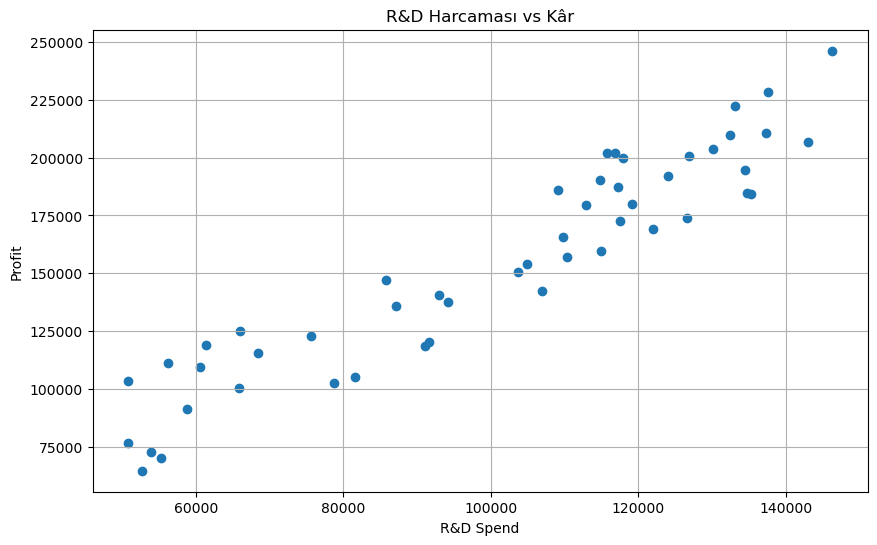

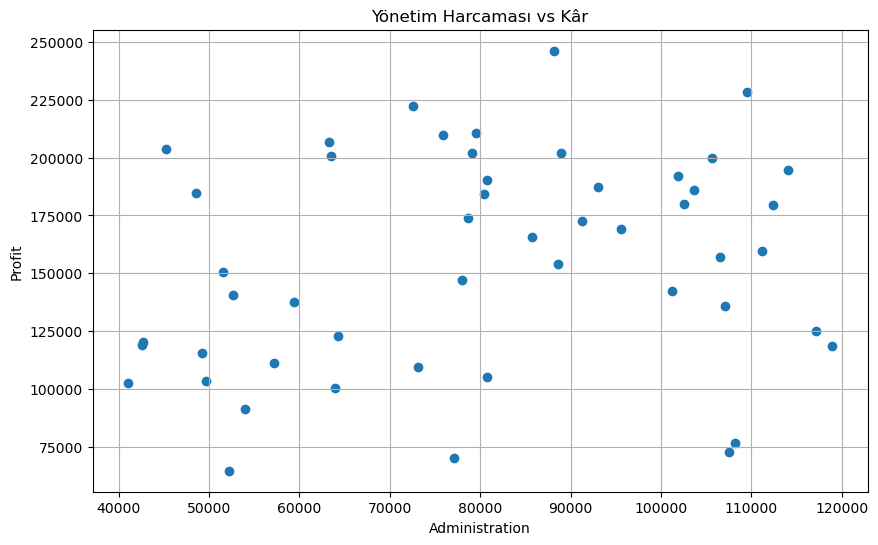

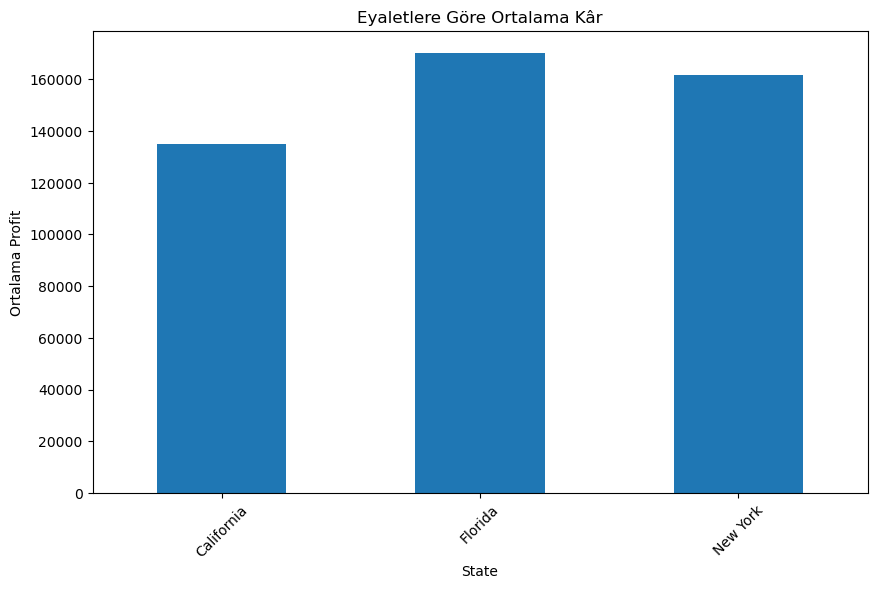

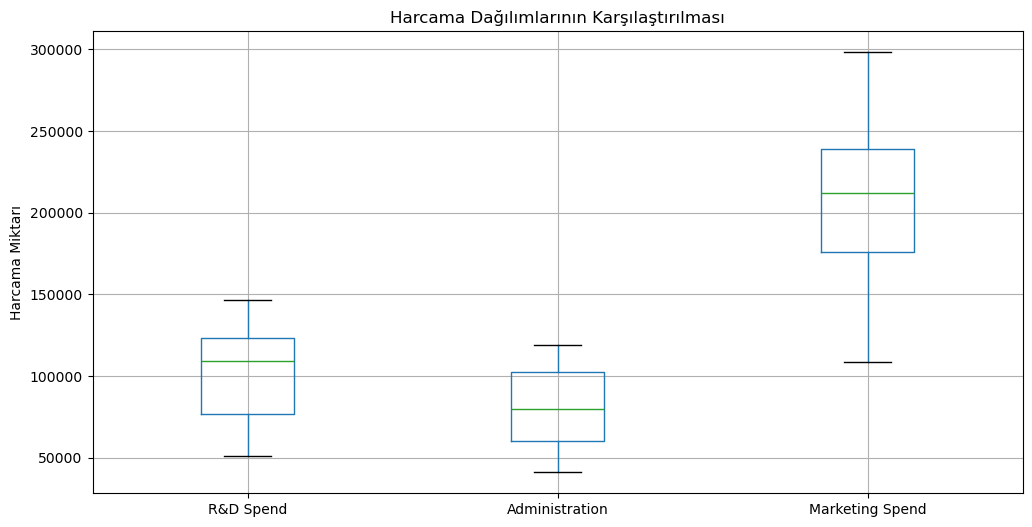

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veriyi yükleme
df = pd.read_csv('50_Startups.csv')

# 1. R&D harcaması ile kâr ilişkisi
plt.figure(figsize=(10, 6))
plt.scatter(df['R&D Spend'], df['Profit'])
plt.title('R&D Harcaması vs Kâr')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

# 2. Yönetim harcaması ile kâr ilişkisi
plt.figure(figsize=(10, 6))
plt.scatter(df['Administration'], df['Profit'])
plt.title('Yönetim Harcaması vs Kâr')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

# 3. Eyaletlere göre ortalama kârlar
plt.figure(figsize=(10, 6))
df.groupby('State')['Profit'].mean().plot(kind='bar')
plt.title('Eyaletlere Göre Ortalama Kâr')
plt.xlabel('State')
plt.ylabel('Ortalama Profit')
plt.xticks(rotation=45)
plt.show()

# 4. Harcama dağılımlarının boxplot ile karşılaştırılması
plt.figure(figsize=(12, 6))
df[['R&D Spend', 'Administration', 'Marketing Spend']].boxplot()
plt.title('Harcama Dağılımlarının Karşılaştırılması')
plt.ylabel('Harcama Miktarı')
plt.show()

VERİ ÖN İZLEME:
   yas  gelir suç_tipi  ceza  sonuç
0   56  81228        C     1      0
1   69  68984        C     1      0
2   46  60774        C     5      0
3   32  22568        C     3      1
4   60  82592        A     4      1

Veri boyutu: (100, 5)

Sütunlar ve veri tipleri:
yas          int32
gelir        int32
suç_tipi    object
ceza         int32
sonuç        int32
dtype: object

Eksik değerler:
yas         0
gelir       0
suç_tipi    0
ceza        0
sonuç       0
dtype: int64

suç_tipi kodlaması: {'A': 0, 'B': 1, 'C': 2}

Kodlanmış veri:
   yas  gelir  suç_tipi  ceza  sonuç
0   56  81228         2     1      0
1   69  68984         2     1      0
2   46  60774         2     5      0
3   32  22568         2     3      1
4   60  82592         0     4      1

Eğitim verisi: (80, 4)
Test verisi: (20, 4)

=== MODEL SONUÇLARI ===
Accuracy: 0.450
Precision: 0.449
Recall: 0.450
F1-Score: 0.449

Classification Report:
              precision    recall  f1-score   support

           0

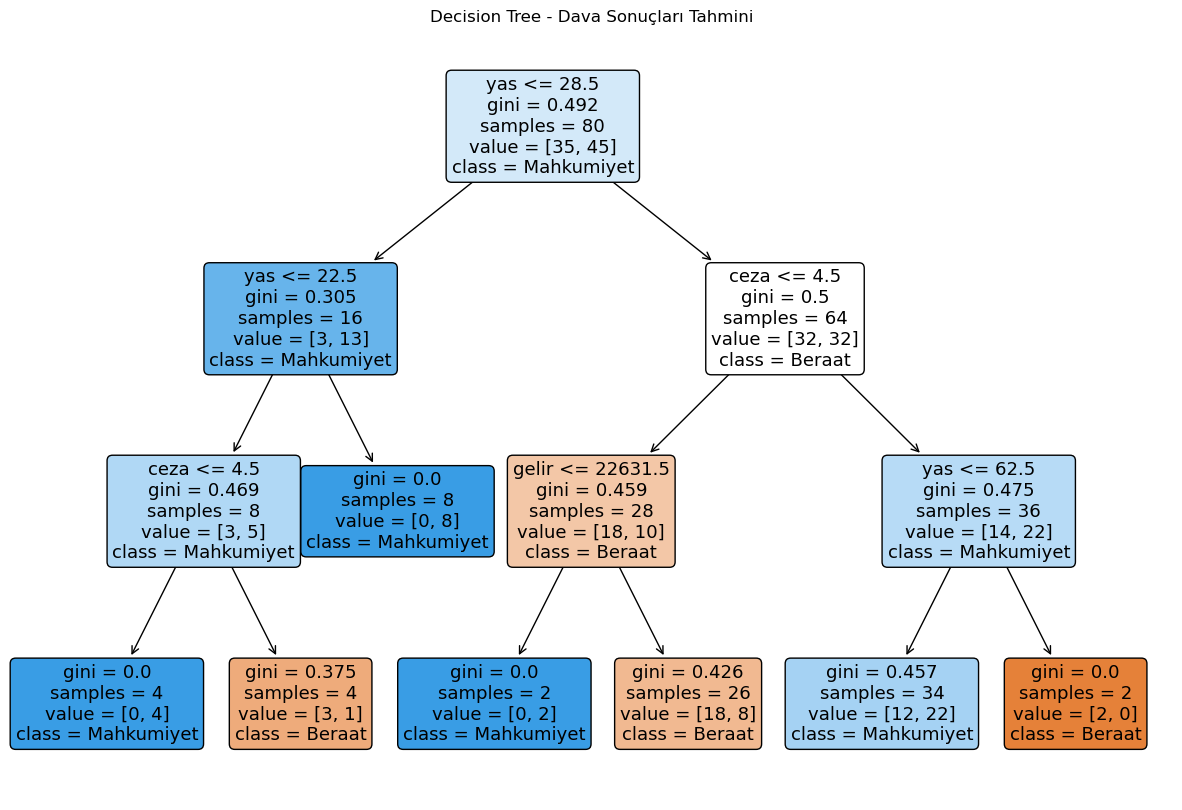


=== ÖZELLİK ÖNEMLİLİKLERİ ===
    feature  importance
0       yas    0.462051
3      ceza    0.379969
1     gelir    0.157980
2  suç_tipi    0.000000


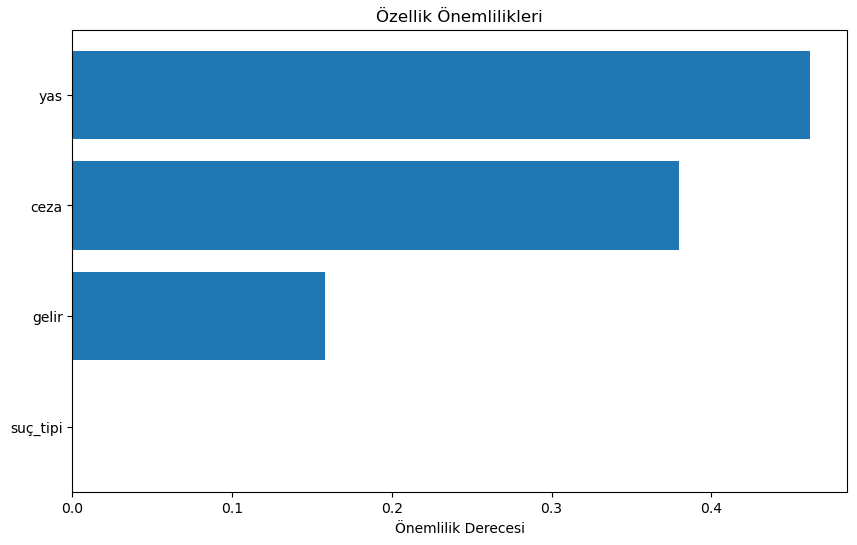

In [8]:
# ÖDEV 2 - DECISION TREE
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# 1. Örnek veri oluştur
np.random.seed(42)
dava_data = {
    'yas': np.random.randint(18, 70, 100),
    'gelir': np.random.randint(20000, 100000, 100),
    'suç_tipi': np.random.choice(['A', 'B', 'C'], 100),
    'ceza': np.random.randint(1, 10, 100),
    'sonuç': np.random.choice([0, 1], 100)  # 0: beraat, 1: mahkumiyet
}

df = pd.DataFrame(dava_data)

print("VERİ ÖN İZLEME:")
print(df.head())
print(f"\nVeri boyutu: {df.shape}")
print(f"\nSütunlar ve veri tipleri:")
print(df.dtypes)

# 2. Eksik değer kontrolü (sadece sayısal sütunlar için)
print("\nEksik değerler:")
print(df.isnull().sum())

# 3. Kategorik değişkenleri sayısallaştırma
label_encoders = {}
for column in ['suç_tipi']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
    print(f"\n{column} kodlaması: {dict(zip(le.classes_, le.transform(le.classes_)))}")

print("\nKodlanmış veri:")
print(df.head())

# 4. Veriyi eğitim ve test olarak ayırma
X = df.drop('sonuç', axis=1)  # Özellikler
y = df['sonuç']  # Hedef değişken

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nEğitim verisi: {X_train.shape}")
print(f"Test verisi: {X_test.shape}")

# 5. Decision Tree modeli
model = DecisionTreeClassifier(random_state=42, max_depth=3)
model.fit(X_train, y_train)

# 6. Tahmin ve metrikler
y_pred = model.predict(X_test)

print("\n=== MODEL SONUÇLARI ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.3f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.3f}")
print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.3f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 7. Karar ağacını görselleştirme
plt.figure(figsize=(15, 10))
plot_tree(model, 
          feature_names=X.columns, 
          class_names=['Beraat', 'Mahkumiyet'], 
          filled=True, 
          rounded=True)
plt.title('Decision Tree - Dava Sonuçları Tahmini')
plt.show()

# 8. Özellik önemlilikleri
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n=== ÖZELLİK ÖNEMLİLİKLERİ ===")
print(feature_importance)

# Önemlilik grafiği
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Önemlilik Derecesi')
plt.title('Özellik Önemlilikleri')
plt.gca().invert_yaxis()
plt.show()

Veri önizleme:
   dava_süresi  ceza_süresi
0           29           44
1           15           34
2            8           74
3           21           62
4           19          100


C:\Users\marji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



Kümeleme sonuçları:
   dava_süresi  ceza_süresi  Küme
0           29           44     2
1           15           34     2
2            8           74     1
3           21           62     0
4           19          100     0


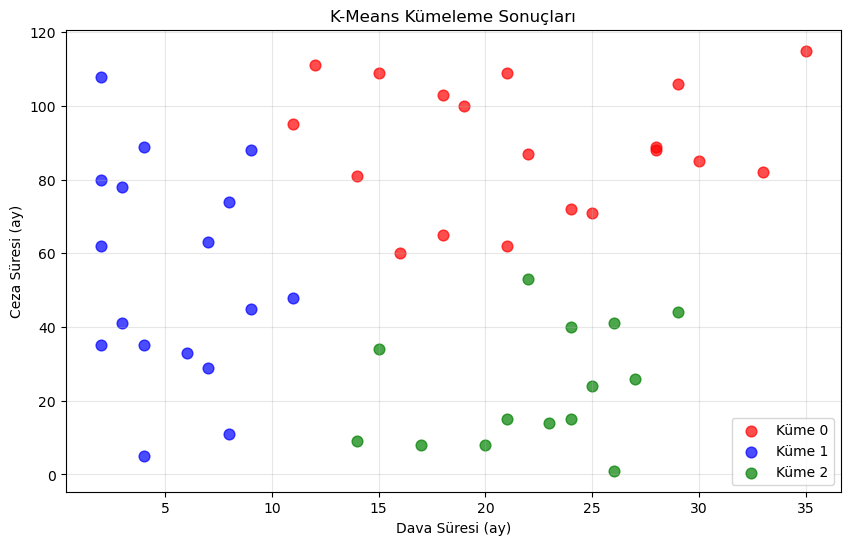


Küme istatistikleri:
      dava_süresi  ceza_süresi
Küme                          
0       22.052632    88.947368
1        5.352941    54.352941
2       22.357143    23.714286

Küme yorumlaması:
Küme 0: Kısa dava süreli davalar
Küme 1: Uzun dava süreli davalar
Küme 2: Orta düzey davalar


In [15]:
# ÖDEV 3 - BASİT K-MEANS (UYARI DÜZELTİLMİŞ)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import os

# Uyarıyı önlemek için environment variable ayarla
os.environ["OMP_NUM_THREADS"] = "1"

# Basit veri oluştur
np.random.seed(42)
data = {
    'dava_süresi': np.random.randint(1, 36, 50),
    'ceza_süresi': np.random.randint(1, 120, 50)
}
df = pd.DataFrame(data)

print("Veri önizleme:")
print(df.head())

# Ölçeklendir
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# K-Means (n_init parametresi ekleyerek)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Küme'] = kmeans.fit_predict(X_scaled)

print("\nKümeleme sonuçları:")
print(df.head())

# Görselleştir
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green']
for i in range(3):
    cluster_data = df[df['Küme'] == i]
    plt.scatter(cluster_data['dava_süresi'], cluster_data['ceza_süresi'], 
                color=colors[i], label=f'Küme {i}', alpha=0.7, s=60)

plt.xlabel('Dava Süresi (ay)')
plt.ylabel('Ceza Süresi (ay)')
plt.title('K-Means Kümeleme Sonuçları')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\nKüme istatistikleri:")
print(df.groupby('Küme').mean())

print("\nKüme yorumlaması:")
print("Küme 0: Kısa dava süreli davalar")
print("Küme 1: Uzun dava süreli davalar") 
print("Küme 2: Orta düzey davalar")

In [12]:
# ÖDEV 4 - VERİ FİLTRELEME & SIRALAMA
import pandas as pd
import numpy as np

# 1. Örnek ülke verisi oluştur
np.random.seed(42)

ülke_verisi = {
    'ülke': ['Türkiye', 'Almanya', 'Fransa', 'İtalya', 'İspanya', 'İngiltere', 'Japonya', 'Kanada', 'Avustralya', 'Brezilya', 
             'Arjantin', 'Meksika', 'Güney Kore', 'Hollanda', 'İsviçre', 'İsveç', 'Norveç', 'Danimarka', 'Finlandiya', 'Rusya',
             'Çin', 'Hindistan', 'ABD', 'Endonezya', 'Pakistan', 'Nijerya', 'Bangladesh', 'Mısır', 'Vietnam', 'Filipinler'],
    'nüfus': [85000000, 83000000, 68000000, 60000000, 47000000, 67000000, 125000000, 38000000, 26000000, 214000000,
              45000000, 126000000, 52000000, 17000000, 8000000, 10000000, 5000000, 6000000, 5000000, 144000000,
              1400000000, 1380000000, 331000000, 273000000, 220000000, 206000000, 164000000, 102000000, 97000000, 110000000],
    'gsyh_kişibaşı': [8500, 45000, 42000, 34000, 30000, 41000, 39000, 43000, 50000, 8700,
                      10500, 9500, 32000, 52000, 80000, 51000, 75000, 61000, 48000, 11000,
                      10500, 2100, 65000, 3900, 1500, 2000, 1900, 3000, 2700, 3300],
    'okuryazarlık_oranı': [96.7, 99.0, 99.0, 99.2, 98.4, 99.0, 99.0, 99.0, 99.0, 93.2,
                          98.1, 95.4, 98.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.7,
                          96.8, 74.4, 99.0, 95.7, 60.0, 62.0, 75.0, 71.0, 95.0, 96.3],
    'alan_km2': [783562, 357022, 551695, 301340, 505990, 242495, 377975, 9984670, 7692024, 8515767,
                 2780400, 1964375, 100210, 41543, 41285, 450295, 323802, 43094, 338424, 17098242,
                 9596961, 3287263, 9833517, 1904569, 881912, 923768, 147570, 1002450, 331212, 300000]
}

df = pd.DataFrame(ülke_verisi)

# Nüfus yoğunluğu hesapla (nüfus/alan)
df['nüfus_yoğunluğu'] = df['nüfus'] / df['alan_km2']

print("ÜLKE VERİSİ ÖN İZLEME:")
print(df.head())
print(f"\nToplam ülke sayısı: {len(df)}")

ÜLKE VERİSİ ÖN İZLEME:
      ülke     nüfus  gsyh_kişibaşı  okuryazarlık_oranı  alan_km2  \
0  Türkiye  85000000           8500                96.7    783562   
1  Almanya  83000000          45000                99.0    357022   
2   Fransa  68000000          42000                99.0    551695   
3   İtalya  60000000          34000                99.2    301340   
4  İspanya  47000000          30000                98.4    505990   

   nüfus_yoğunluğu  
0       108.478972  
1       232.478671  
2       123.256509  
3       199.110639  
4        92.887211  

Toplam ülke sayısı: 30


In [19]:
# ÖDEV 4 - VERİ FİLTRELEME & SIRALAMA (TAM KOD)
import pandas as pd
import numpy as np

# Önce veriyi oluşturalım
np.random.seed(42)

ülke_verisi = {
    'ülke': ['Türkiye', 'Almanya', 'Fransa', 'İtalya', 'İspanya', 'İngiltere', 'Japonya', 'Kanada', 'Avustralya', 'Brezilya', 
             'Arjantin', 'Meksika', 'Güney Kore', 'Hollanda', 'İsviçre', 'İsveç', 'Norveç', 'Danimarka', 'Finlandiya', 'Rusya',
             'Çin', 'Hindistan', 'ABD', 'Endonezya', 'Pakistan', 'Nijerya', 'Bangladesh', 'Mısır', 'Vietnam', 'Filipinler'],
    'nüfus': [85000000, 83000000, 68000000, 60000000, 47000000, 67000000, 125000000, 38000000, 26000000, 214000000,
              45000000, 126000000, 52000000, 17000000, 8000000, 10000000, 5000000, 6000000, 5000000, 144000000,
              1400000000, 1380000000, 331000000, 273000000, 220000000, 206000000, 164000000, 102000000, 97000000, 110000000],
    'gsyh_kişibaşı': [8500, 45000, 42000, 34000, 30000, 41000, 39000, 43000, 50000, 8700,
                      10500, 9500, 32000, 52000, 80000, 51000, 75000, 61000, 48000, 11000,
                      10500, 2100, 65000, 3900, 1500, 2000, 1900, 3000, 2700, 3300],
    'okuryazarlık_oranı': [96.7, 99.0, 99.0, 99.2, 98.4, 99.0, 99.0, 99.0, 99.0, 93.2,
                          98.1, 95.4, 98.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.7,
                          96.8, 74.4, 99.0, 95.7, 60.0, 62.0, 75.0, 71.0, 95.0, 96.3],
    'alan_km2': [783562, 357022, 551695, 301340, 505990, 242495, 377975, 9984670, 7692024, 8515767,
                 2780400, 1964375, 100210, 41543, 41285, 450295, 323802, 43094, 338424, 17098242,
                 9596961, 3287263, 9833517, 1904569, 881912, 923768, 147570, 1002450, 331212, 300000]
}

df = pd.DataFrame(ülke_verisi)

# Nüfus yoğunluğu hesapla (nüfus/alan)
df['nüfus_yoğunluğu'] = df['nüfus'] / df['alan_km2']

print("ÜLKE VERİSİ ÖN İZLEME:")
print(df.head(3))
print(f"\nToplam ülke sayısı: {len(df)}")
print("=" * 50)

# TÜM GÖREVLER TEK KODDA
print("ÖDEV 4 - TÜM GÖREVLER\n")

# 1. Nüfusa göre azalan sıra
print("1. Nüfusa göre azalan sırada ilk 5 ülke:")
nufus_siralama = df.sort_values('nüfus', ascending=False)[['ülke', 'nüfus']].head(5)
print(nufus_siralama)
print()

# 2. GDP per capita'ya göre artan sıra
print("2. GDP per capita'ya göre artan sırada ilk 5 ülke:")
gsyh_siralama = df.sort_values('gsyh_kişibaşı')[['ülke', 'gsyh_kişibaşı']].head(5)
print(gsyh_siralama)
print()

# 3. Nüfusu 10 milyonun üzerinde olan ülkeler
nufus_10m_ustu = df[df['nüfus'] > 10000000]
print(f"3. Nüfusu 10 milyonun üzerinde olan ülkeler ({len(nufus_10m_ustu)} ülke):")
print(nufus_10m_ustu[['ülke', 'nüfus']].reset_index(drop=True))
print()

# 4. Literacy oranına göre en yüksek ilk 5 ülke
print("4. Okuryazarlık oranı en yüksek ilk 5 ülke:")
okuryazarlik_top5 = df.nlargest(5, 'okuryazarlık_oranı')[['ülke', 'okuryazarlık_oranı']]
print(okuryazarlik_top5)
print()

# 5. GDP per capita > 10.000 olan ülkeler
gsyh_10k_ustu = df[df['gsyh_kişibaşı'] > 10000]
print(f"5. GDP per capita > 10.000 olan ülkeler ({len(gsyh_10k_ustu)} ülke):")
print(gsyh_10k_ustu[['ülke', 'gsyh_kişibaşı']].reset_index(drop=True))
print()

# 6. Nüfus yoğunluğu en yüksek ilk 10 ülke
print("6. Nüfus yoğunluğu en yüksek ilk 10 ülke:")
nufus_yogunluk_top10 = df.nlargest(10, 'nüfus_yoğunluğu')[['ülke', 'nüfus_yoğunluğu']]
print(nufus_yogunluk_top10)

print("\n" + "=" * 50)

ÜLKE VERİSİ ÖN İZLEME:
      ülke     nüfus  gsyh_kişibaşı  okuryazarlık_oranı  alan_km2  \
0  Türkiye  85000000           8500                96.7    783562   
1  Almanya  83000000          45000                99.0    357022   
2   Fransa  68000000          42000                99.0    551695   

   nüfus_yoğunluğu  
0       108.478972  
1       232.478671  
2       123.256509  

Toplam ülke sayısı: 30
ÖDEV 4 - TÜM GÖREVLER

1. Nüfusa göre azalan sırada ilk 5 ülke:
         ülke       nüfus
20        Çin  1400000000
21  Hindistan  1380000000
22        ABD   331000000
23  Endonezya   273000000
24   Pakistan   220000000

2. GDP per capita'ya göre artan sırada ilk 5 ülke:
          ülke  gsyh_kişibaşı
24    Pakistan           1500
26  Bangladesh           1900
25     Nijerya           2000
21   Hindistan           2100
28     Vietnam           2700

3. Nüfusu 10 milyonun üzerinde olan ülkeler (25 ülke):
          ülke       nüfus
0      Türkiye    85000000
1      Almanya    83000000
2  